C:\Users\chris\AppData\Local\Temp\ipykernel_22384\213123878.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ends = portfolio_unit.resample('M').last().index


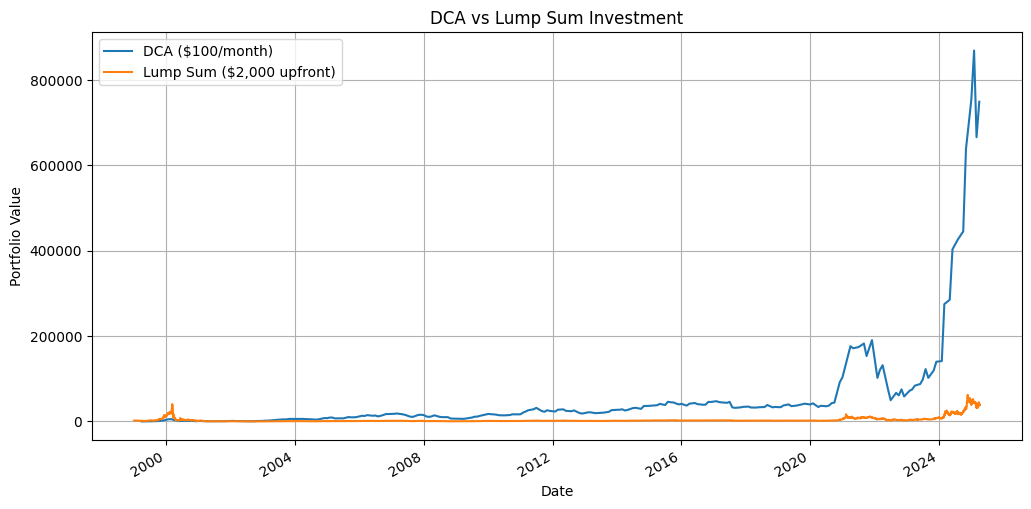

📦 Final DCA Value: $748,444.87
💰 Final Lump Sum Value: $38,129.65


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load prices & high-growth weights
prices = pd.read_csv("../data/raw/my_actual_portfolio.csv", index_col=0, parse_dates=True)
weights = pd.read_csv("../data/processed/high_growth_weights.csv", index_col=0).squeeze("columns")

# Normalize prices
normalized = prices / prices.iloc[0]

# Multiply by weights to get portfolio unit value over time
portfolio_unit = normalized.mul(weights, axis=1).sum(axis=1)

monthly_contribution = 100
start_date = portfolio_unit.index[0]
end_date = portfolio_unit.index[-1]

# Get all month-end dates
month_ends = portfolio_unit.resample('M').last().index

dca_value = 0
shares_held = 0
dca_history = []

for date in month_ends:
    if date not in portfolio_unit:
        continue
    price = portfolio_unit.loc[date]
    shares_bought = monthly_contribution / price
    shares_held += shares_bought
    dca_value = shares_held * price
    dca_history.append((date, dca_value))

dca_df = pd.DataFrame(dca_history, columns=["Date", "DCA Value"]).set_index("Date")

# Assume $2,000 invested up front (e.g. 20 months x $100)
lump_sum_value = portfolio_unit * (2000 / portfolio_unit.iloc[0])

plt.figure(figsize=(12, 6))
dca_df["DCA Value"].plot(label="DCA ($100/month)")
lump_sum_value.plot(label="Lump Sum ($2,000 upfront)")
plt.title("DCA vs Lump Sum Investment")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.legend()
plt.show()

dca_final = dca_df["DCA Value"].iloc[-1]
lump_sum_final = lump_sum_value.loc[dca_df.index[-1]]  # match last DCA date

print(f"📦 Final DCA Value: ${dca_final:,.2f}")
print(f"💰 Final Lump Sum Value: ${lump_sum_final:,.2f}")

dca_df.to_csv("../outputs/results/dca_simulation_high_growth.csv")
